<a href="https://colab.research.google.com/github/asin977/DATASCIENCE-ASSIGNMENT/blob/main/Regression_assignmentipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd


file_path = "/car_age_price.csv"
df = pd.read_csv(file_path)
print(df)



     Year   Price
0    2018  465000
1    2019  755000
2    2019  700000
3    2018  465000
4    2018  465000
..    ...     ...
107  2016  375000
108  2014  300000
109  2015  425000
110  2016  420000
111  2015  425000

[112 rows x 2 columns]


The given dataset contains the price of a second-hand Hyundai grand i10 car
with respect to year of making. Find the best linear relationship between year
and price. Can you predict the possible price of a 2022 model second-hand
grand i10?


In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from google.colab import files



print("\nDataset Head:\n", df.head())


print("\nMissing Values:\n", df.isnull().sum())


df['Car_Age'] = 2024 - df['Year']





Dataset Head:
    Year   Price
0  2018  465000
1  2019  755000
2  2019  700000
3  2018  465000
4  2018  465000

Missing Values:
 Year     0
Price    0
dtype: int64


Please learn about lasso regression and create a model along with linear
regression. Find out which one is performing better.

     Year   Price
0    2018  465000
1    2019  755000
2    2019  700000
3    2018  465000
4    2018  465000
..    ...     ...
107  2016  375000
108  2014  300000
109  2015  425000
110  2016  420000
111  2015  425000

[112 rows x 2 columns]

Dataset Head:
    Year   Price
0  2018  465000
1  2019  755000
2  2019  700000
3  2018  465000
4  2018  465000

Missing Values:
 Year     0
Price    0
dtype: int64

🔹 Model Performance:
Linear Regression -> MSE: 4326906256.83, R²: 0.3676
Lasso Regression  -> MSE: 4326859771.02, R²: 0.3676

🔹 Predicted Price for 2022 Model:
Linear Regression: ₹743601.62
Lasso Regression:  ₹743599.37


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


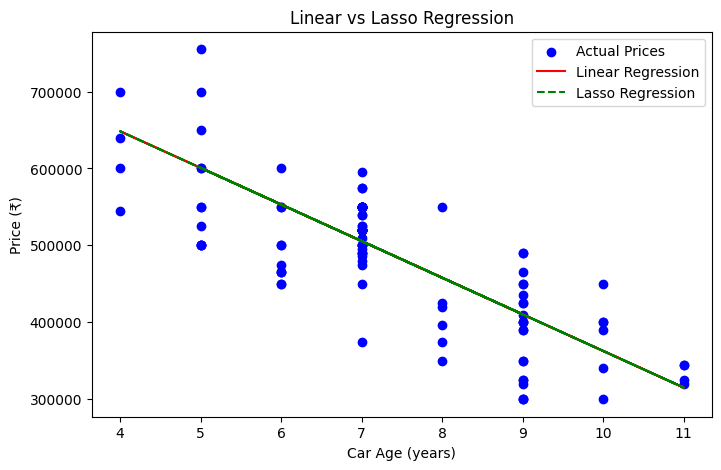

In [4]:

import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from google.colab import files



file_path = "/car_age_price.csv"
df = pd.read_csv(file_path)
print(df)





print("\nDataset Head:\n", df.head())


print("\nMissing Values:\n", df.isnull().sum())


df['Car_Age'] = 2024 - df['Year']


X = df[['Car_Age']]
y = df['Price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)


lasso_reg = Lasso(alpha=1.0)
lasso_reg.fit(X_train, y_train)
y_pred_lasso = lasso_reg.predict(X_test)


lin_mse = mean_squared_error(y_test, y_pred_lin)
lin_r2 = r2_score(y_test, y_pred_lin)

lasso_mse = mean_squared_error(y_test, y_pred_lasso)
lasso_r2 = r2_score(y_test, y_pred_lasso)

print("\n🔹 Model Performance:")
print(f"Linear Regression -> MSE: {lin_mse:.2f}, R²: {lin_r2:.4f}")
print(f"Lasso Regression  -> MSE: {lasso_mse:.2f}, R²: {lasso_r2:.4f}")


car_age_2022 = [[2024 - 2022]]

lin_pred_2022 = lin_reg.predict(car_age_2022)[0]
lasso_pred_2022 = lasso_reg.predict(car_age_2022)[0]

print(f"\n🔹 Predicted Price for 2022 Model:")
print(f"Linear Regression: ₹{lin_pred_2022:.2f}")
print(f"Lasso Regression:  ₹{lasso_pred_2022:.2f}")


plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Actual Prices')
plt.plot(X_test, y_pred_lin, color='red', label='Linear Regression')
plt.plot(X_test, y_pred_lasso, color='green', linestyle='dashed', label='Lasso Regression')
plt.xlabel("Car Age (years)")
plt.ylabel("Price (₹)")
plt.legend()
plt.title("Linear vs Lasso Regression")
plt.show()
